### The data columns are:

1) Pregnancy
2) Glucose
3) Blood Pressure
4) SkinThickness
5) Insulin
6) BMI
7) DiabetesPedigreeFunction
8) Age
9) Outcome

We'll be using the other columsn to predict feature 9: Diabetes diagnoses (0, 1) where 0 = No, 1 = Yes

We will be prediction column (9), whether the person has diabetes(1) or not(0).

## Loading dataset:

In [2]:
data = pd.read_csv('../data/diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [32]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [33]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
scaler = StandardScaler()

In [5]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
scaler.fit(data.drop('Outcome',axis=1))


StandardScaler()

In [7]:
scaled_feats = scaler.transform(data.drop('Outcome', axis=1))

In [8]:
#Converting the scaled features to a dataframe
scaled_df = pd.DataFrame(scaled_feats)
scaled_df.columns =['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

In [9]:
scaled_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [10]:
##Model building

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = scaled_df
y = data['Outcome']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [14]:
from sklearn.neighbors import KNeighborsClassifier


In [15]:
knn = KNeighborsClassifier(n_neighbors=1)


In [16]:
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=1)

In [17]:
#predictions

In [18]:
predictions = knn.predict(X_test)


In [19]:
from sklearn.metrics import classification_report,confusion_matrix


In [20]:
print(confusion_matrix(y_test,predictions))


[[79 20]
 [23 32]]


In [21]:
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.77      0.80      0.79        99
           1       0.62      0.58      0.60        55

    accuracy                           0.72       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.72      0.72      0.72       154



In [22]:
error_rate =[]
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predictions = knn.predict(X_test)
    error_rate.append(np.mean(predictions != y_test))

Text(0, 0.5, 'Error Rate')

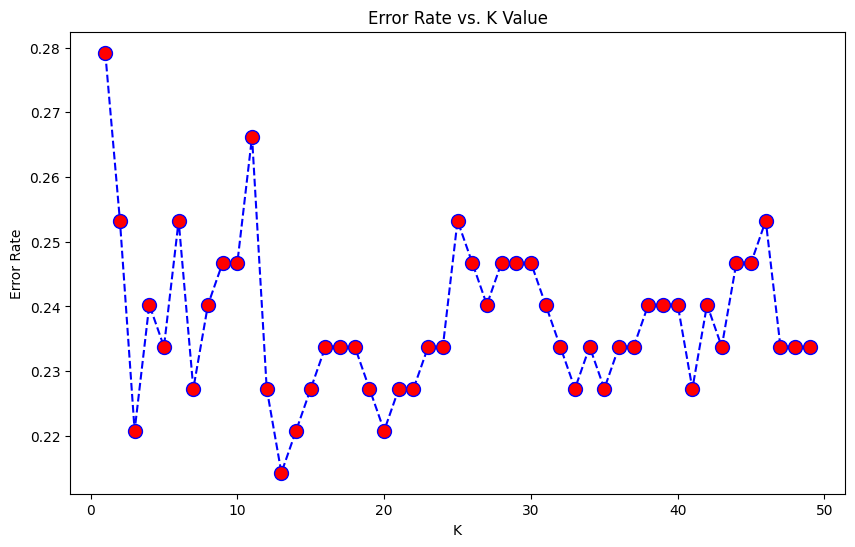

In [23]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [30]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)

In [31]:

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[92  7]
 [26 29]]
              precision    recall  f1-score   support

           0       0.78      0.93      0.85        99
           1       0.81      0.53      0.64        55

    accuracy                           0.79       154
   macro avg       0.79      0.73      0.74       154
weighted avg       0.79      0.79      0.77       154

